# Haberman’s Cancer Survival Data

1.Number of row: 306

2.Number of column: 4 (last one gives information about patient survival status which is the class attribute)

3.Attribute Information:

I.Patient'age when they are going through operation  
II.Year when they are going through operation   
III.Number of positive axillary nodes were found   
IV.Survival status 1 = the patient who survived 5 years or longer 2 = the patient who died before 5 year


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

hb = pd.read_csv( 'haberman.csv')

In [2]:
hb.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [2]:
# print out the number of data-points and features.
print (hb.shape)

(306, 4)


In [3]:
# print out the number of column persent in dataset.
print (hb.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [4]:
# print out the number of data_point available for each class.
hb["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

# let's learn dataset through graph vitualization

# (1)  2-D Scatter Plot

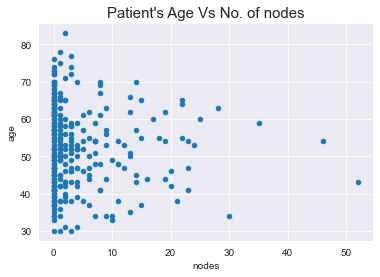

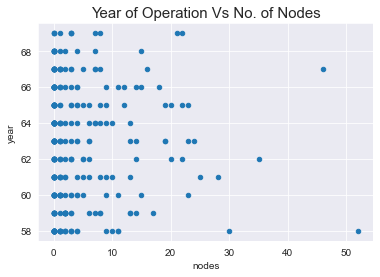

In [105]:
hb.plot(kind='scatter', x='nodes', y='age') ;
plt.title("Patient's Age Vs No. of nodes",fontsize = 15)
hb.plot(kind='scatter', x='nodes', y='year') ;
plt.title('Year of Operation Vs No. of Nodes',fontsize = 15)
plt.show()



Observation(s):
1. In first plot , datapoints are dense at one place and scatter out as number of nodes increases.

2.In second plot, datapoints are spread over the plot , so we cannot make any sense out of it.

so we will look down to 1st plot in detail with class label to get clear picture.

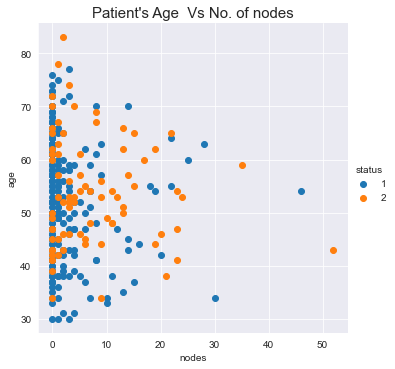

In [90]:
sns.set_style("darkgrid");
sns.FacetGrid(hb, hue="status", height=5) \
   .map(plt.scatter, "nodes", "age") \
   .add_legend();
plt.title("Patient's Age  Vs No. of nodes",fontsize = 15)
plt.show();

# it is very hard to come to conclusion since they are mixed .


Observation(s):

1.It is very much clear that average number of nodes which present to patient's age between 30 to below 80 were below 10.                           

2.The patient's survival chance were found more irrespective of any age group if they node of range 0 to 2.                 

3.Person age below 30 have hardly any node found.

# (2) Pair-plot

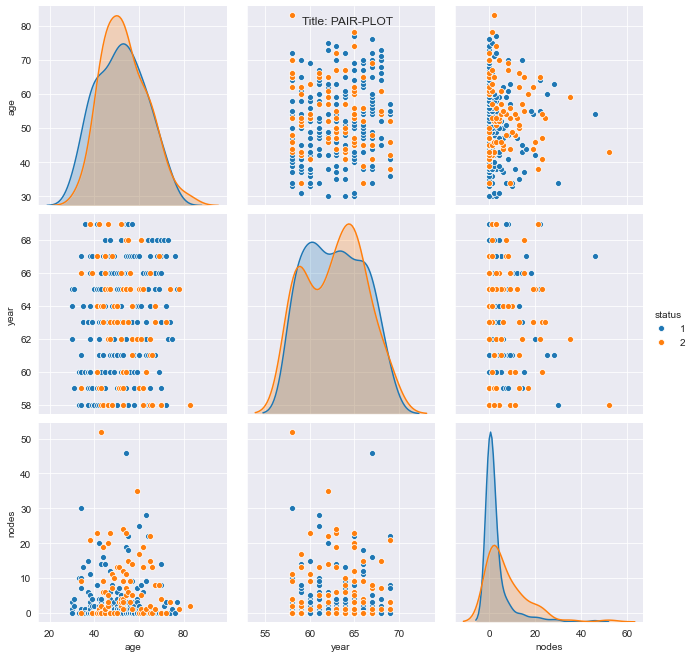

In [8]:
import warnings
warnings.filterwarnings('ignore')

plt.close();
sns.set_style("darkgrid");
sns.pairplot(hb, hue="status", height=3);
plt.suptitle('Title: PAIR-PLOT')
plt.show()

# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

Observations

1. The age and nodes features are found more likable to fetch the information about patient's survival chances.


2. As the number of nodes to person age group along with survival rate can clearly examined if we plot graph between nodes and age.


# (3) Histogram, PDF, CDF

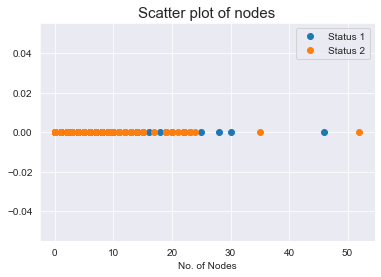

In [106]:
import numpy as np
hb_status_1 = hb.loc[hb["status"] == 1];
hb_status_2 = hb.loc[hb["status"] == 2];

plt.plot(hb_status_1["nodes"], np.zeros_like(hb_status_1['nodes']), 'o')
plt.plot(hb_status_2["nodes"], np.zeros_like(hb_status_2['nodes']), 'o')
plt.xlabel("No. of Nodes")
plt.title('Scatter plot of nodes' , fontsize=15)
plt.legend(['Status 1','Status 2'])
plt.show()


Observations:                                                                                          
1.it is very hard to make any sense out of it as they are densely overlaped.
    

In [4]:
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


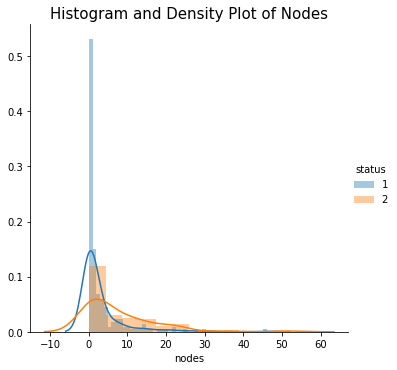

In [3]:
import warnings
warnings.filterwarnings('ignore')

sns.FacetGrid(hb , hue="status", height=5).map(sns.distplot, "nodes").add_legend();
plt.title('Histogram and Density Plot of Nodes',fontsize=15)
plt.show();

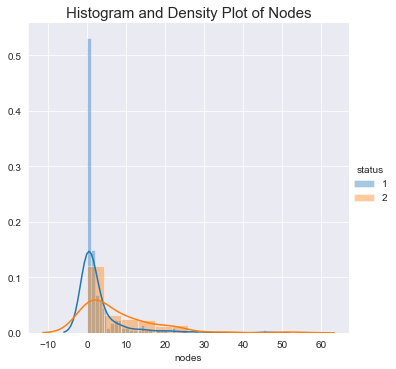

In [75]:
import warnings
warnings.filterwarnings('ignore')

sns.FacetGrid(hb , hue="status", height=5).map(sns.distplot, "nodes").add_legend();
plt.title('Histogram and Density Plot of Nodes',fontsize=15)
plt.show();

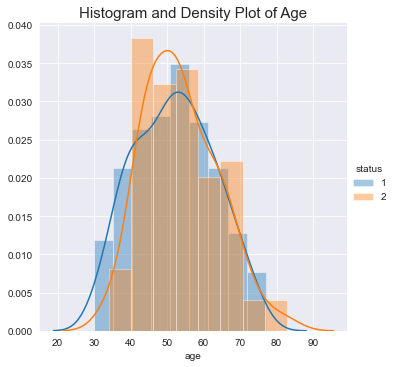

In [74]:
sns.FacetGrid(hb , hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Histogram and Density Plot of Age',fontsize=15)
plt.show();

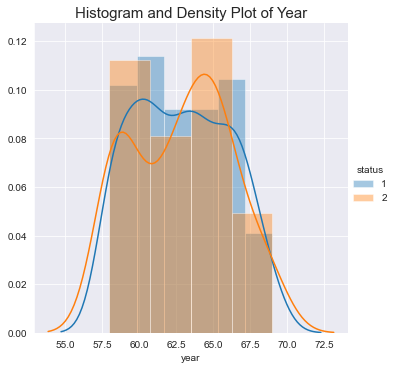

In [73]:
sns.FacetGrid(hb , hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title('Histogram and Density Plot of Year',fontsize=15)
plt.show();

Observations:                                                                                                 
1.The distribution plot against nodes feature are found reliable as it clearly says the survival chances are eponentialy high for nodes range between 0 - 5. 

2. Remaining two graph are more vaguely distributed as distributions are overlapped.

# 3.1 Cumulative Distribution Function(CDF) Of status 1 Against Nodes

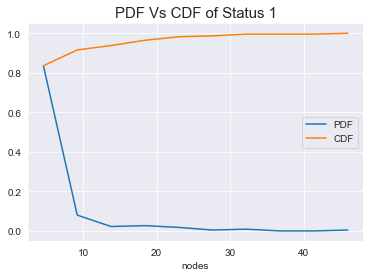

In [72]:
counts, bin_edges = np.histogram(hb_status_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('nodes')
plt.title("PDF Vs CDF of Status 1",fontsize=15)
plt.legend(['PDF','CDF'])
plt.show();

Observations:                                                                                               
1. 95% of the patients who have survived above 5 years had  nodes in the range of 0–10.

# 3.2 Cumulative Distribution Function(CDF) Of status 2 Against Nodes

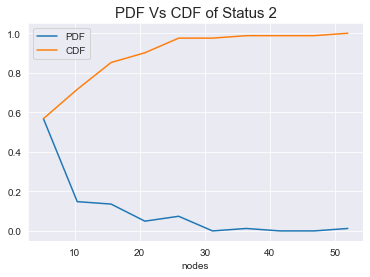

In [71]:
counts, bin_edges = np.histogram(hb_status_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('nodes')
plt.title("PDF Vs CDF of Status 2",fontsize = 15)
plt.legend(['PDF','CDF'])

plt.show();

Observations:

1. The patients who had nodes in range 0-10 have 70% probability that they might died before 5 years and as number of nodes increases , percentage increase gradually and died early.

# (4) Box plot and Whiskers

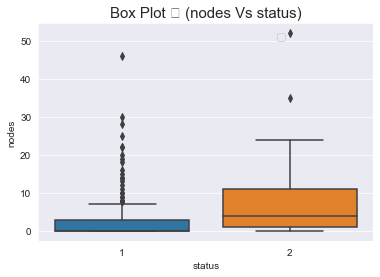

In [121]:
import warnings
warnings.filterwarnings('ignore')
plt.title("Box Plot \t (nodes Vs status)",fontsize=15)
ax=sns.boxplot(x='status',y='nodes', data=hb)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper right', ncol=2, bbox_to_anchor=(.75, 0.98))
plt.show()

Observations:

1. Between the range of 25%(lower quartile) to 75%(upper quartile) of status 1 of had nodes in the range 0 - 4 approx  lies in catagory where patients survived for more than 5 years but in the same ways 50%(median) of status 2 had nodes in range 2 -4 approx lies in catagory where the patients died within 5 year. It means there is more chance that patient could survive if they had number of node in the range of 2- 4 approx.


2. numbers of nodes more in the range of  5 - 10 had more chance that they could not survive as patients who had nodes in the given range fall in category status 2 than 1.

# (5) Violin plots

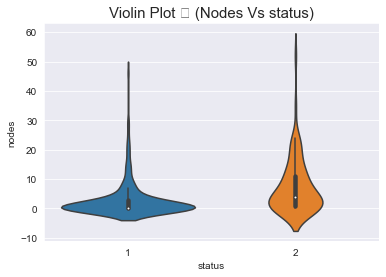

In [94]:
sns.violinplot(x="status", y="nodes", data=hb, size=8)
plt.title("Violin Plot \t (Nodes Vs status)",fontsize=15)
plt.show()

Observations:

1. PDF of status 1 has sharp peak as compared with 2 which means PDF curve is less spread in 1 than 2 
and PDF curve is widely distributed in status 2.


2. numbers of parients with nodes between 0 -4 had more probability to survive for more than 5 years
as graph shows sharp peak at median point of status 1

# (6) Multivariate probability density, contour plot.

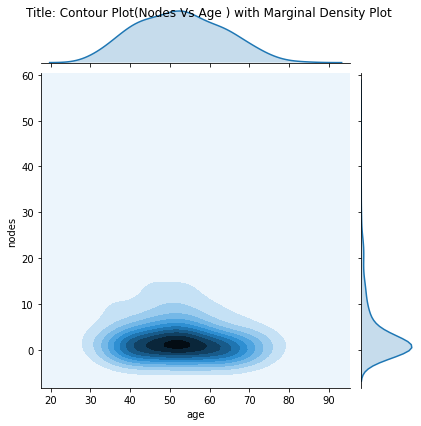

In [6]:
sns.jointplot(x="age", y="nodes", data=hb, kind="kde");
plt.suptitle('Title: Contour Plot(Nodes Vs Age ) with Marginal Density Plot')
plt.show();

Observations:

1. As the graph show that PDF of age is widely distributed between 30 to 80 and PDF of nodes is more dense at median.

2.this contour plot shows that maximum no. of cancer patients were having age between 49yr to 58 yr approx. as there is dark blue area lie on this range. 